# Poincaré Sections

`DoublePendulumSubclassMomenta` is a class refactor aiming to plot Poincaré sections

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

from MathFunctions import *
from DoublePendulumSubclassMomenta import DoublePendulum, DoublePendulumExplorer

----
&nbsp;
#### Variable & Parameter Declaration

In [2]:
l1, l2, m1, m2, M1, M2, g = sp.symbols('l1 l2 m1 m2 M1 M2 g', real=True, positive=True)

# Declare functions
theta1 = sp.Function('theta1')(t)
theta2 = sp.Function('theta2')(t)
p_theta_1 = sp.Function('p_theta_1')(t)
p_theta_2 = sp.Function('p_theta_2')(t)

In [3]:
# Set Unity Parameters for dimensionless pendulums
params = {
    g: 9.81,  # Acceleration due to gravity (m/s^2)
    l1: 1.0,  # Length of the first rod (m)
    l2: 1.0,  # Length of the second rod (m)
    m1: 1.0,  # Mass of the first bob (kg)
    m2: 1.0,  # Mass of the second bob (kg)
    M1: 1.0,  # Mass of first uniform rod (kg)
    M2: 1.0   # Mass of second uniform rod (kg)
}

In [4]:
# Time vector

stop = 30
fps = 800  # frames/second
no_steps = stop * fps

time = [0, stop, no_steps]

Increasing the time interval above 120 seconds does produce more Poincaré points but increases the noise

Going to try setting it for 60 seconds, hopefully less noise

----
&nbsp;
#### Potential Energy Calculator

We need to find $E_{\text{mech}}$ of the system which is all potential energy when releasing the pendulums from rest

In [5]:
def calculate_potential_energy(theta1_val, theta2_val, parameters, model='simple'):
    """
    Calculate the potential energy of the double pendulum system relative to the datum where theta1 = 0 and theta2 = 0.
    """
    if model == 'simple':
        V = -(m1 + m2) * g * l1 * sp.cos(theta1) - m2 * g * l2 * sp.cos(theta2)

    elif model == 'compound':
        V = -M1 * g * (l1 / 2) * sp.cos(theta1) - M2 * g * ((l1 * sp.cos(theta1)) + (l2 / 2) * sp.cos(theta2))

    else:
        raise ValueError("Model must be 'simple' or 'compound'")

    V = V.subs(parameters)
    V_subst = V.subs({theta1: theta1_val, theta2: theta2_val})
    # Calculate potential energy at theta1 = 0 and theta2 = 0 (datum)
    V_zero = V.subs({theta1: 0, theta2: 0})
    V_relative = V_subst - V_zero

    return V_relative

In [6]:
angle1 = 180
angle2 = 0

theta1val = np.deg2rad(angle1)
theta2val = np.deg2rad(angle2)

In [7]:
# Calculate potential energy for the 'simple' model
V_simple = calculate_potential_energy(theta1val, theta2val, params, model='simple')
print(f"Potential Energy (Simple Model): {V_simple:.2f} J")

# Calculate potential energy for the 'compound' model
V_compound = calculate_potential_energy(theta1val, theta2val, params, model='compound')
print(f"Potential Energy (Compound Model): {V_compound:.2f} J")

Potential Energy (Simple Model): 39.24 J
Potential Energy (Compound Model): 29.43 J


----
&nbsp;
#### `DoublePendulumExplorer` instantiation

In [8]:
# Testing simple pendulum instantiation
# Initial conditions (theta1, theta2, omega1, omega2)

time_single = [0, 20, 4000]
init_values = [0, 120, 0, 0]
pendulum1 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time_single)

In [9]:
pendulum1.precompute_positions()
#pendulum1.animate_pendulum(appearance='dark')

Tweaking the `step_size_degrees` argument. Default is 0.5

In [10]:
simple_explorer = DoublePendulumExplorer(params, time, 'simple', step_size_degrees=0.125)

DoublePendulumExplorer initialized with base class.
Mechanical energy: 39.24 J


In [11]:
compound_explorer = DoublePendulumExplorer(params, time, 'compound', step_size_degrees=0.125)

DoublePendulumExplorer initialized with base class.
Mechanical energy: 29.43 J


----
&nbsp;
### The Poincaré Section

Check [`solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) documentation to tweak integrator arguments

In [12]:
# Define additional parameters for the numerical integration
integrator_args = {
    'rtol': 1e-7,    # default is 1e-3
    'atol': 1e-9     # default is 1e-6
    #'method': 'RK45',
}

With looser tolerances defined above, the solver introduces small errors at each step that accumulate over time, leading to points that are slightly off from their true positions. 

- Tighter tolerances hopefully reduce this drift at the expense of computational load. 

- We want an accurate representation of the system’s dynamics and we want it in a 'reasonable runtime`. These parameters are mutually exclusive

`n_jobs` parameter in the Parallel module of `_run_simulations()`

- **`n_jobs=-1`**: 
  - Use all available CPU cores.
  - Maximizes speed, but can fully load the CPU.

- **`n_jobs=None` or `n_jobs=1`**: 
  - Use a single core (no parallelism).

- **`n_jobs=X`** (where `X` is a positive integer): 
  - Use `X` CPU cores.
  - Balance between speed and resource usage.

- **`n_jobs=-2`**: 
  - Use all but one core.
  - Keeps one core free for other tasks.

- **`n_jobs=-X`** (where `X` > 1): 
  - Use all but `X` cores.
  - Leaves more cores free for other processes.

## `simple model`

#### Setting $\theta_1$ to zero in Poincaré section

In [13]:
simple_explorer.find_poincare_section(**integrator_args)

Batch 1 of 36 complete. Time taken: 12.32 seconds.
Batch 2 of 36 complete. Time taken: 9.77 seconds.
Batch 3 of 36 complete. Time taken: 9.70 seconds.
Batch 4 of 36 complete. Time taken: 9.88 seconds.
Batch 5 of 36 complete. Time taken: 9.70 seconds.
Batch 6 of 36 complete. Time taken: 9.76 seconds.
Batch 7 of 36 complete. Time taken: 9.65 seconds.
Batch 8 of 36 complete. Time taken: 9.49 seconds.
Batch 9 of 36 complete. Time taken: 9.69 seconds.
Batch 10 of 36 complete. Time taken: 9.90 seconds.
Batch 11 of 36 complete. Time taken: 9.81 seconds.
Batch 12 of 36 complete. Time taken: 9.65 seconds.
Batch 13 of 36 complete. Time taken: 9.60 seconds.
Batch 14 of 36 complete. Time taken: 9.46 seconds.
Batch 15 of 36 complete. Time taken: 9.35 seconds.
Batch 16 of 36 complete. Time taken: 9.26 seconds.
Batch 17 of 36 complete. Time taken: 9.00 seconds.
Batch 18 of 36 complete. Time taken: 8.48 seconds.
Batch 19 of 36 complete. Time taken: 8.55 seconds.
Batch 20 of 36 complete. Time taken: 9.

In [14]:
print(simple_explorer.initial_condition_data.shape)
print(type(simple_explorer.initial_condition_data))

i = 180
print(f"For i = {i}:\n"
      f"Length of initial condition data: {len(simple_explorer.initial_condition_data[180])}\n"
      f"Length of Poincaré data: {len(simple_explorer.poincare_section_data[180])}")

(2880, 24000, 4)
<class 'numpy.ndarray'>
For i = 180:
Length of initial condition data: 24000
Length of Poincaré data: 17


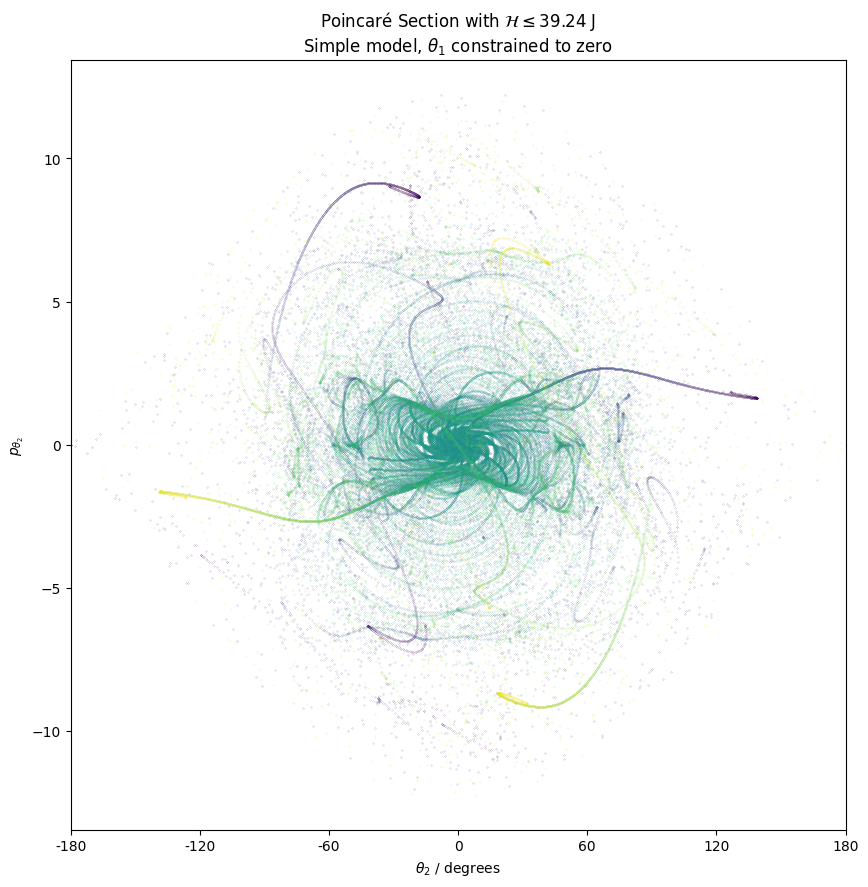

In [15]:
simple_explorer.plot_poincare_map()

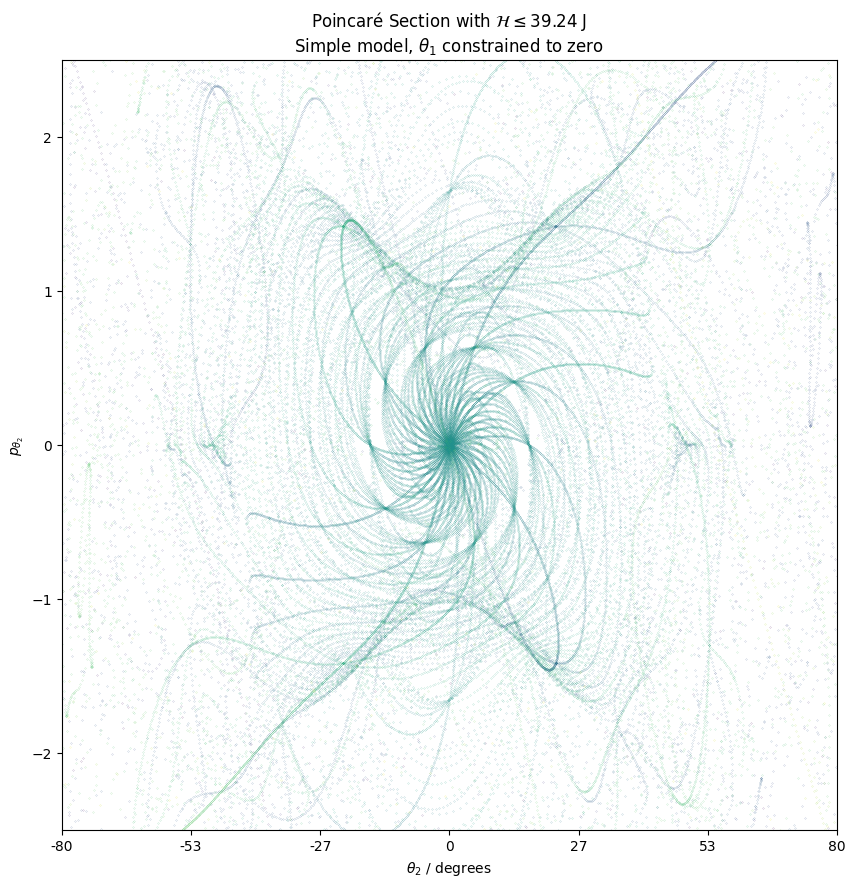

In [16]:
simple_explorer.plot_poincare_map(xrange=(-80*(np.pi/180), 80*(np.pi/180)), yrange=(-2.5, 2.5))

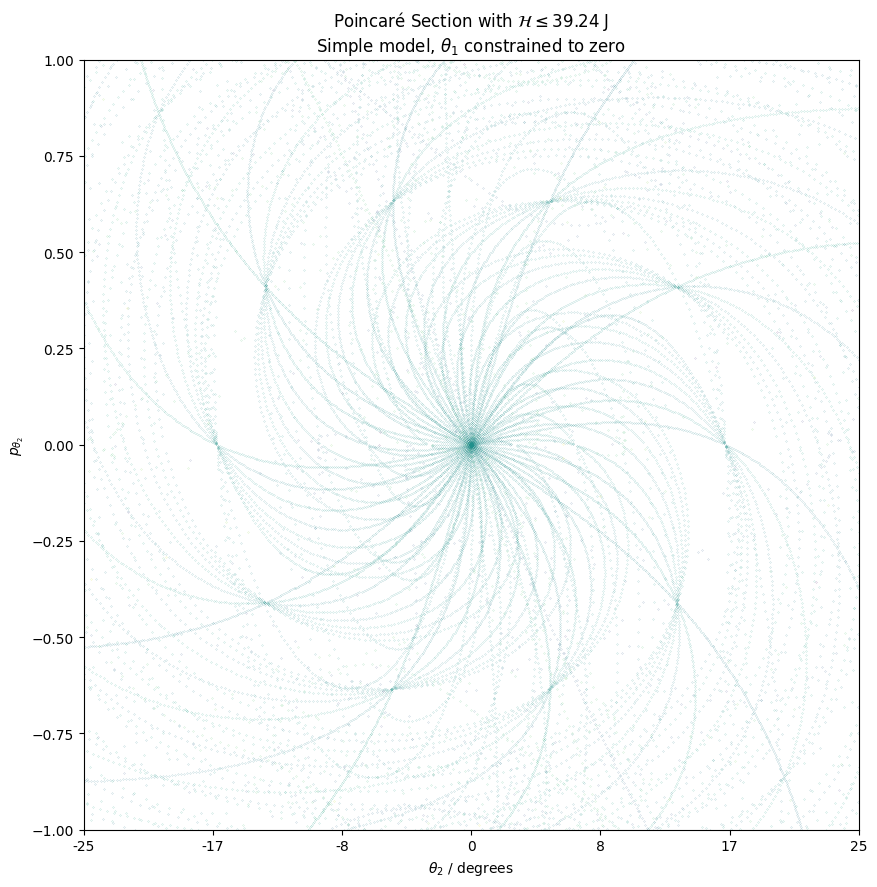

In [17]:
simple_explorer.plot_poincare_map(xrange=(-25*(np.pi/180), 25*(np.pi/180)), yrange=(-1, 1))

----
&nbsp;
#### Setting $\theta_2$ to zero in Poincaré section

In [18]:
simple_explorer.find_poincare_section(fixed_angle='theta2', **integrator_args)

Fixed angle changed from theta1 to theta2. Re-running simulations.
Batch 1 of 36 complete. Time taken: 34.16 seconds.
Batch 2 of 36 complete. Time taken: 33.91 seconds.
Batch 3 of 36 complete. Time taken: 34.29 seconds.
Batch 4 of 36 complete. Time taken: 34.75 seconds.
Batch 5 of 36 complete. Time taken: 33.69 seconds.
Batch 6 of 36 complete. Time taken: 34.13 seconds.
Batch 7 of 36 complete. Time taken: 33.74 seconds.
Batch 8 of 36 complete. Time taken: 33.80 seconds.
Batch 9 of 36 complete. Time taken: 33.76 seconds.
Batch 10 of 36 complete. Time taken: 33.79 seconds.
Batch 11 of 36 complete. Time taken: 33.95 seconds.
Batch 12 of 36 complete. Time taken: 33.89 seconds.
Batch 13 of 36 complete. Time taken: 33.88 seconds.
Batch 14 of 36 complete. Time taken: 33.91 seconds.
Batch 15 of 36 complete. Time taken: 33.93 seconds.
Batch 16 of 36 complete. Time taken: 33.83 seconds.
Batch 17 of 36 complete. Time taken: 36.18 seconds.
Batch 18 of 36 complete. Time taken: 35.07 seconds.
Batch 

In [19]:
print(simple_explorer.initial_condition_data.shape)
print(type(simple_explorer.initial_condition_data))

i = 180
print(f"For i = {i}:\n"
      f"Length of initial condition data: {len(simple_explorer.initial_condition_data[180])}\n"
      f"Length of Poincaré data: {len(simple_explorer.poincare_section_data[180])}")

(2880, 24000, 4)
<class 'numpy.ndarray'>
For i = 180:
Length of initial condition data: 24000
Length of Poincaré data: 30


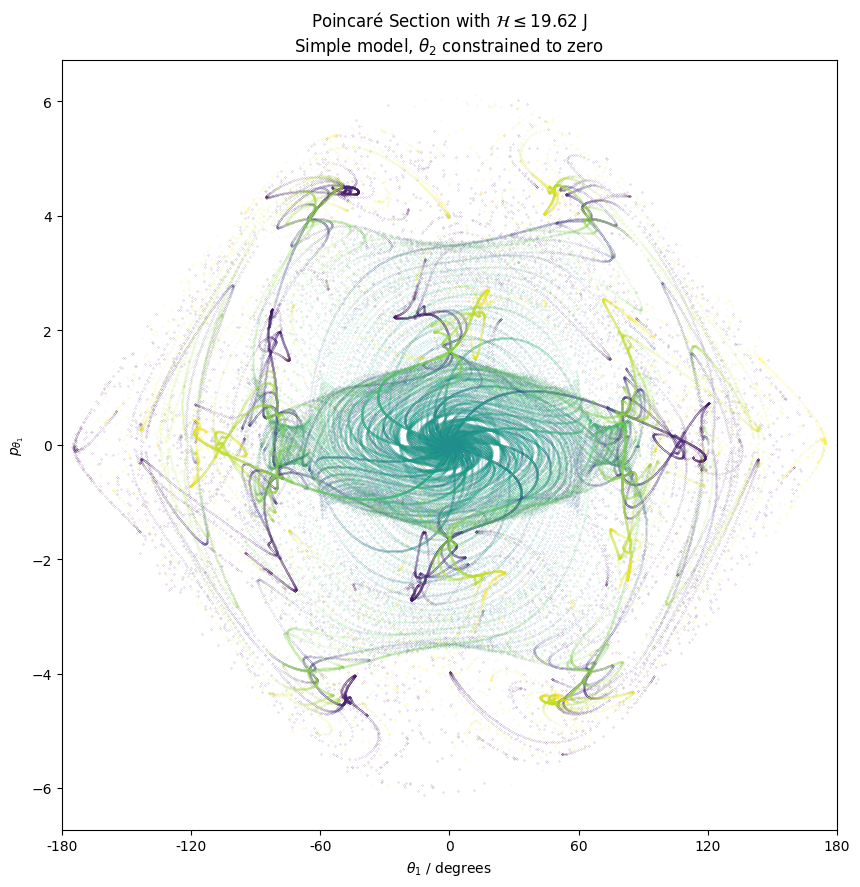

In [20]:
simple_explorer.plot_poincare_map()

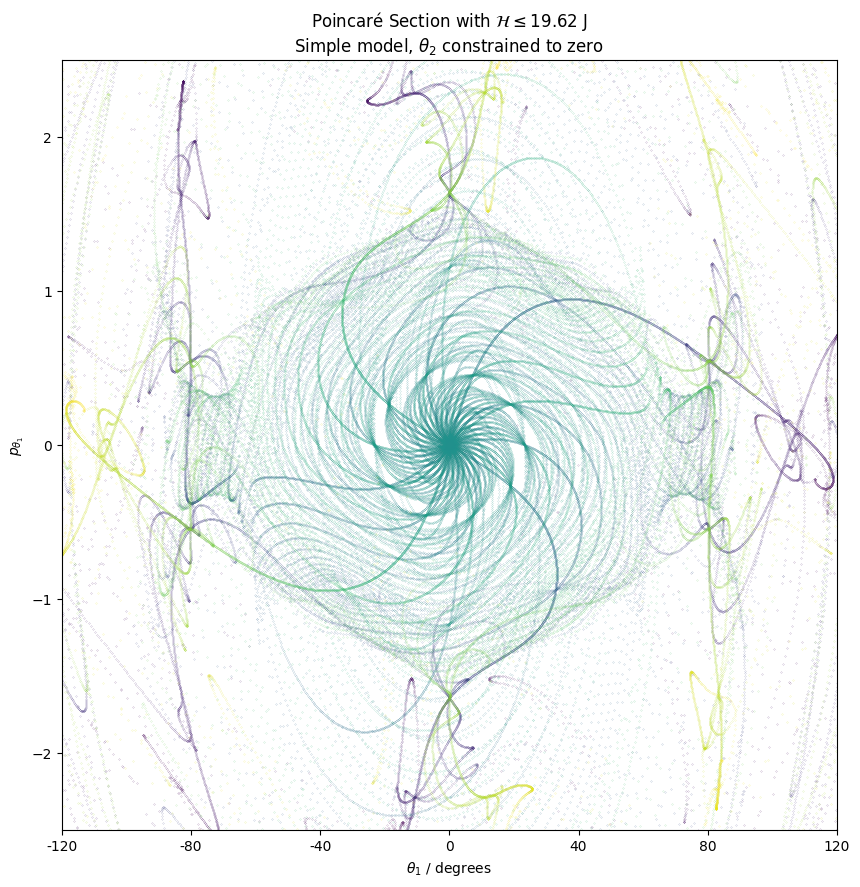

In [21]:
simple_explorer.plot_poincare_map(xrange=(-120*(np.pi/180), 120*(np.pi/180)), yrange=(-2.5, 2.5))

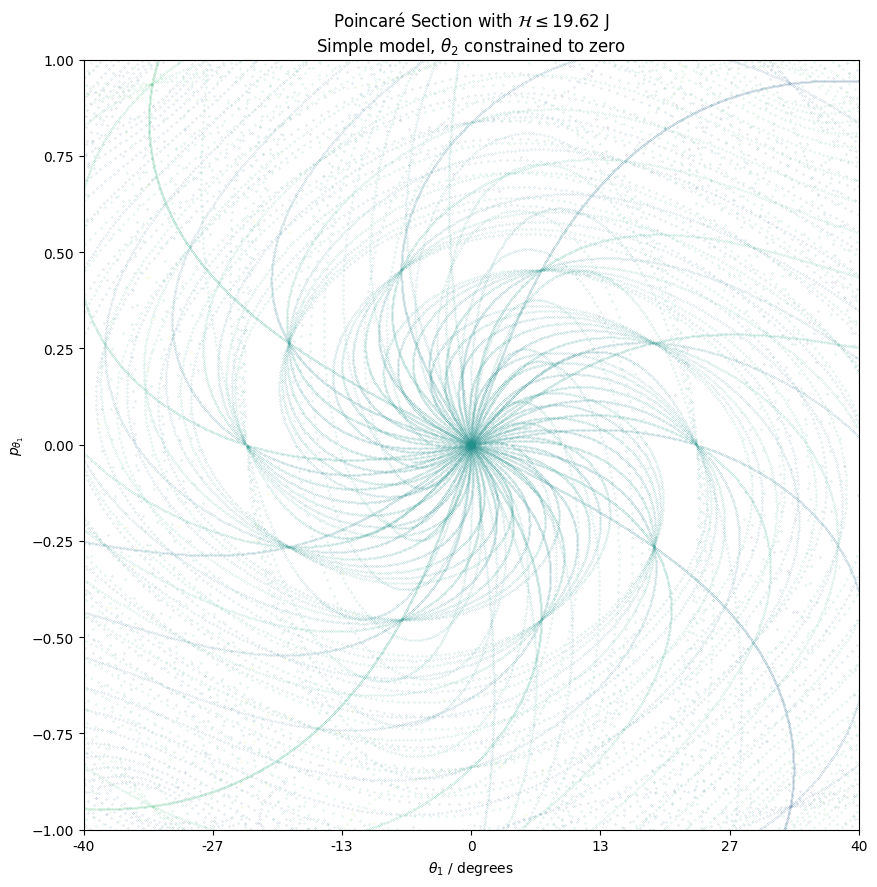

In [22]:
simple_explorer.plot_poincare_map(xrange=(-40*(np.pi/180), 40*(np.pi/180)), yrange=(-1, 1))

----
&nbsp;
## `compound model`

#### Setting $\theta_1$ to zero in Poincaré section

In [23]:
compound_explorer.find_poincare_section(**integrator_args)

Batch 1 of 36 complete. Time taken: 8.68 seconds.
Batch 2 of 36 complete. Time taken: 8.79 seconds.
Batch 3 of 36 complete. Time taken: 8.61 seconds.
Batch 4 of 36 complete. Time taken: 7.92 seconds.
Batch 5 of 36 complete. Time taken: 7.90 seconds.
Batch 6 of 36 complete. Time taken: 7.94 seconds.
Batch 7 of 36 complete. Time taken: 8.11 seconds.
Batch 8 of 36 complete. Time taken: 8.33 seconds.
Batch 9 of 36 complete. Time taken: 8.42 seconds.
Batch 10 of 36 complete. Time taken: 8.25 seconds.
Batch 11 of 36 complete. Time taken: 8.22 seconds.
Batch 12 of 36 complete. Time taken: 8.61 seconds.
Batch 13 of 36 complete. Time taken: 8.37 seconds.
Batch 14 of 36 complete. Time taken: 8.38 seconds.
Batch 15 of 36 complete. Time taken: 8.04 seconds.
Batch 16 of 36 complete. Time taken: 8.02 seconds.
Batch 17 of 36 complete. Time taken: 7.98 seconds.
Batch 18 of 36 complete. Time taken: 7.82 seconds.
Batch 19 of 36 complete. Time taken: 7.82 seconds.
Batch 20 of 36 complete. Time taken: 7.9

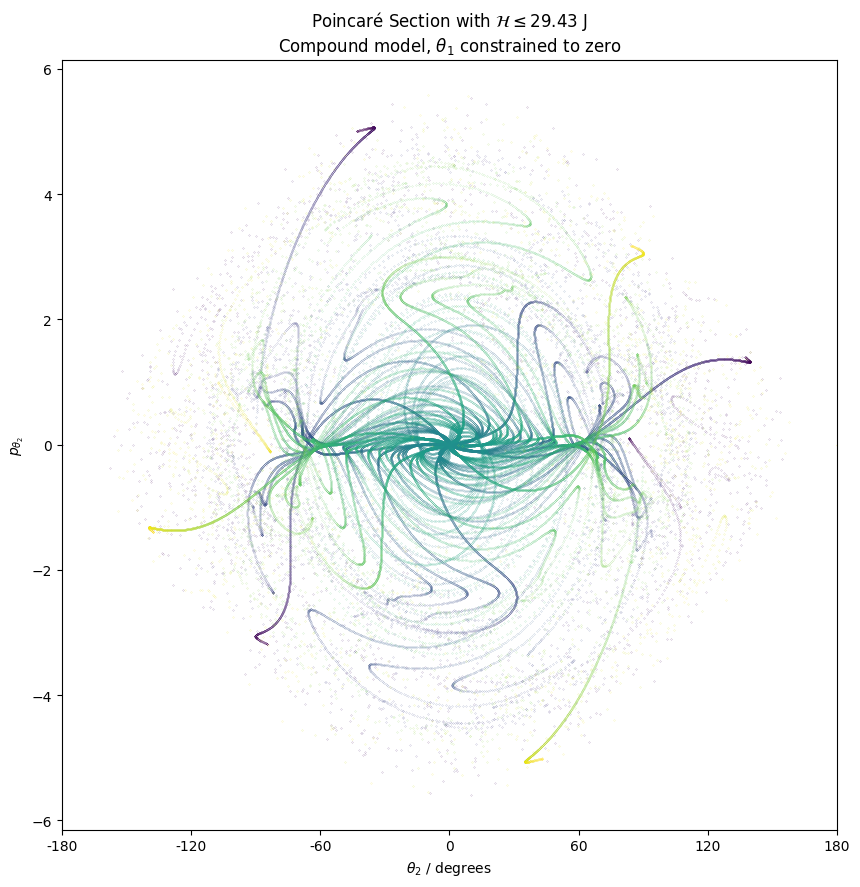

In [24]:
# special_angles_deg=[-90, -60, -30, 30, 60, 90]
compound_explorer.plot_poincare_map()

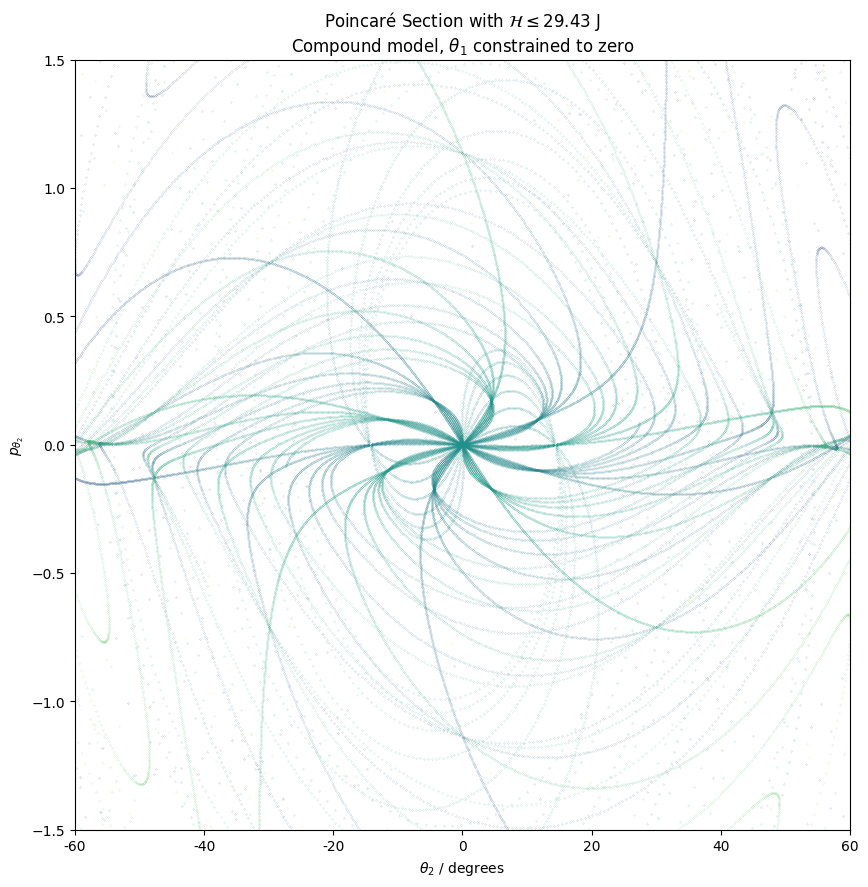

In [25]:
# special_angles_deg=[-90, -60, -30, 30, 60, 90]
compound_explorer.plot_poincare_map(xrange=(-60*(np.pi/180), 60*(np.pi/180)), yrange=(-1.5, 1.5))

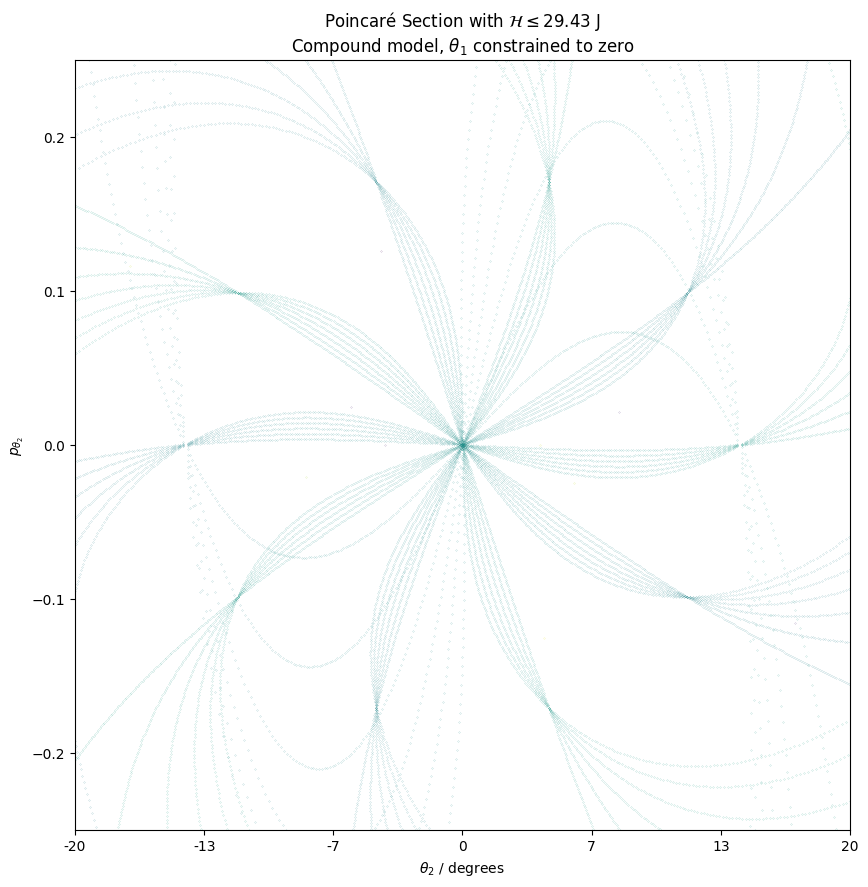

In [26]:
# special_angles_deg=[-90, -60, -30, 30, 60, 90]
compound_explorer.plot_poincare_map(xrange=(-20*(np.pi/180), 20*(np.pi/180)), yrange=(-0.25, 0.25))

----
&nbsp;
#### Setting $\theta_2$ to zero in Poincaré section

In [27]:
compound_explorer.find_poincare_section(fixed_angle='theta2', **integrator_args)

Fixed angle changed from theta1 to theta2. Re-running simulations.
Batch 1 of 36 complete. Time taken: 31.69 seconds.
Batch 2 of 36 complete. Time taken: 30.88 seconds.
Batch 3 of 36 complete. Time taken: 34.34 seconds.
Batch 4 of 36 complete. Time taken: 32.42 seconds.
Batch 5 of 36 complete. Time taken: 31.65 seconds.
Batch 6 of 36 complete. Time taken: 32.83 seconds.
Batch 7 of 36 complete. Time taken: 31.12 seconds.
Batch 8 of 36 complete. Time taken: 31.14 seconds.
Batch 9 of 36 complete. Time taken: 32.80 seconds.
Batch 10 of 36 complete. Time taken: 32.14 seconds.
Batch 11 of 36 complete. Time taken: 31.33 seconds.
Batch 12 of 36 complete. Time taken: 31.60 seconds.
Batch 13 of 36 complete. Time taken: 30.98 seconds.
Batch 14 of 36 complete. Time taken: 31.30 seconds.
Batch 15 of 36 complete. Time taken: 30.72 seconds.
Batch 16 of 36 complete. Time taken: 30.92 seconds.
Batch 17 of 36 complete. Time taken: 31.59 seconds.
Batch 18 of 36 complete. Time taken: 32.06 seconds.
Batch 

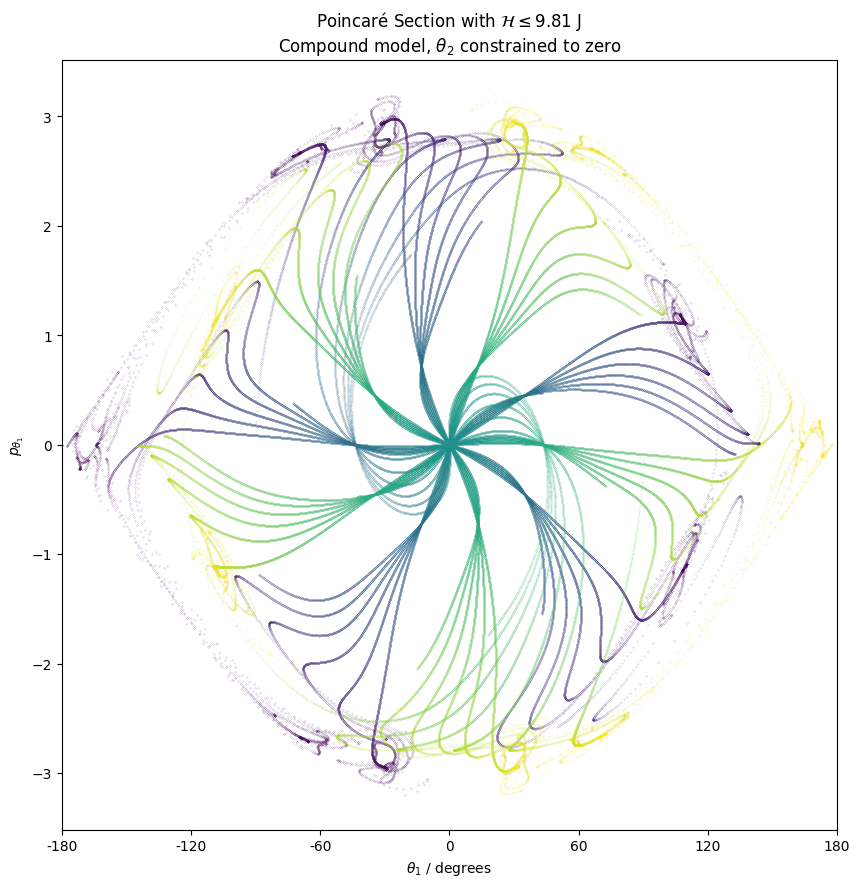

In [28]:
compound_explorer.plot_poincare_map()

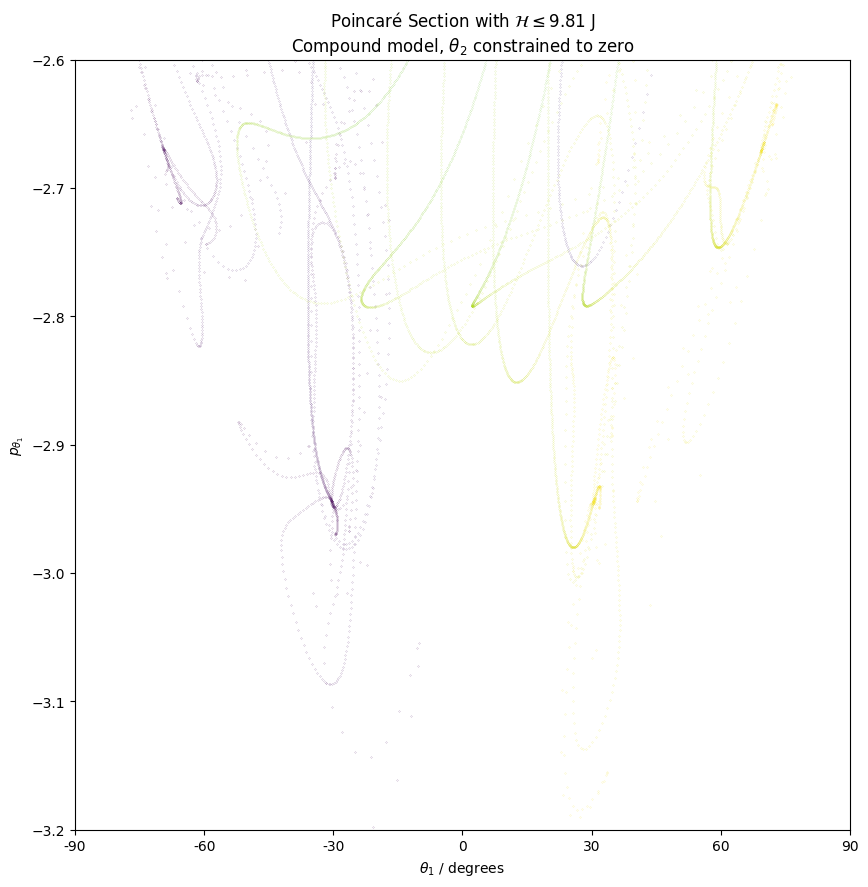

In [31]:
compound_explorer.plot_poincare_map(xrange=(-90*(np.pi/180), 90*(np.pi/180)), yrange=(-3.2, -2.6))